In [1]:
EMULATORS_PATH = "/Users/gabe/projects/emulators/src"
RECOMBINATION_PATH = "/Users/gabe/projects/recombination/src"
PLANCK_LITE_PATH = "/Users/gabe/projects/planck/planck-lite-py"

import sys
import os
import numpy as np
from scipy.interpolate import CubicSpline
import scipy
import classy as Class


import matplotlib as mpl
import matplotlib.pyplot as plt
import cmasher as cmr
from mpl_toolkits.axes_grid1 import make_axes_locatable

if EMULATORS_PATH not in sys.path:
    sys.path.insert(0, "/Users/gabe/projects/emulators/src")
if RECOMBINATION_PATH not in sys.path:
    sys.path.insert(0, "/Users/gabe/projects/recombination/src")
if PLANCK_LITE_PATH not in sys.path:
    sys.path.insert(0, PLANCK_LITE_PATH)
from TrainedEmulator import *
from RecTools import *
from ChainTools import *
from planck_lite_py import PlanckLitePy

from getdist import plots, MCSamples, loadMCSamples

######################################################
#  Setting up plots
######################################################

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'serif'}
axislabelfontsize='large'
mpl.rc('font', **font)
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams['text.usetex']=True

default_settings = plots.GetDistPlotSettings()
default_settings.axes_labelsize = 12
default_settings.fig_width_inch = 6
default_settings.linewidth = 2
default_settings.title_limit = 0
default_settings.legend_fontsize = 12

######################################################
#  Loading Chains
######################################################

#chains_to_load = ["modrec_prec", "modrec_prec_lensing", "lcdm_prec_lensing", "modrec_prec_lensing_bao", "lcdm_prec_lensing_bao"]
chains_to_load = ["modrec_new", "modrec_new_lensing", "modrec_new_lensing_bao", "modrec_new_lensing_bao_shoes", "lcdm_lensing_bao"]

chains = {}

burnin_dict = {"modrec_new": 0.5,
               "modrec_new_lensing": 0.5,
               "modrec_new_lensing_bao": 0.6,
               "modrec_new_lensing_underdisperse": 0.05,
               "modrec_new_lensing_bao_shoes": 0.5,
               "lcdm_lensing_bao": 0.05}

chain_dirname = "/Users/gabe/projects/recombination/data/chains/"

for chain in chains_to_load:
    dirname = os.path.join(chain_dirname, "{}/chains".format(chain))
    s = loadMCSamples(os.path.join(dirname, chain), settings={"ignore_rows": burnin_dict[chain], "fine_bins": 2048})

    chains[chain] = s

chi2_lensing_bao_lcdm_bestfit = chains["lcdm_lensing_bao"].getParamBestFitDict()["chi2__CMB"] + chains["lcdm_lensing_bao"].getParamBestFitDict()["chi2__BAO"]

s_planck = loadMCSamples(os.path.join(chain_dirname, "planck_baseline/base_plikHM_TTTEEE_lowl_lowE_lensing"))

planck_renames = {'omegabh2': 'omega_b',
                  'omegach2': 'omega_cdm', 
                  'tau': 'tau_reio', 
                  'ns': 'n_s',
                  'rdrag': 'rs_d'}
s_planck.updateRenames(planck_renames)
chains["planck_baseline"] = s_planck
planck_bestfit = chains["planck_baseline"].getParamBestFitDict()

s_class = loadMCSamples(os.path.join(chain_dirname, "modrec_new_class/chains/modrec_new.post.CLASS"))
chains["modrec_new_class"] = s_class

s_class = loadMCSamples(os.path.join(chain_dirname, "modrec_new_lensing_bao_shoes_class/chains/modrec_new_lensing_bao_shoes.post.CLASS"))
chains["modrec_new_lensing_bao_shoes_class"] = s_class
######################################################
#  Loading Emulator
######################################################

emulator_dir = "/Users/gabe/projects/emulators/models"
emulator_name = "modrec_new_18"

em = TrainedEmulator(os.path.join(emulator_dir, emulator_name))

2023-11-15 12:57:58.814381: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 12:58:01.728348: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
band_left_edges = np.arange(63.5, 73.5, 1)

chains_to_plot = ["modrec_new_lensing", "modrec_new_lensing_bao"]

pred_dict = {}
model_dict = {}
for chain_name in chains_to_plot:
    pred_dict[chain_name] = {}
    model_dict[chain_name] = {}
    for band in band_left_edges:
        selection_criteria = {"H0": [band, band+1],
                            "chi2": [0, chi2_lensing_bao_lcdm_bestfit]}
        selection_predictions, selection_models =  get_predictions_for_selection(chains[chain_name], em, criteria=selection_criteria)
        pred_dict[chain_name][band] = selection_predictions
        model_dict[chain_name][band] = selection_models

(chain_as_dict["H0"] > 63.5) & (chain_as_dict["H0"] < 64.5) & (chain_as_dict["chi2"] > 0) & (chain_as_dict["chi2"] < 1015.823791899)
(chain_as_dict["H0"] > 64.5) & (chain_as_dict["H0"] < 65.5) & (chain_as_dict["chi2"] > 0) & (chain_as_dict["chi2"] < 1015.823791899)
(chain_as_dict["H0"] > 65.5) & (chain_as_dict["H0"] < 66.5) & (chain_as_dict["chi2"] > 0) & (chain_as_dict["chi2"] < 1015.823791899)
(chain_as_dict["H0"] > 66.5) & (chain_as_dict["H0"] < 67.5) & (chain_as_dict["chi2"] > 0) & (chain_as_dict["chi2"] < 1015.823791899)
(chain_as_dict["H0"] > 67.5) & (chain_as_dict["H0"] < 68.5) & (chain_as_dict["chi2"] > 0) & (chain_as_dict["chi2"] < 1015.823791899)
(chain_as_dict["H0"] > 68.5) & (chain_as_dict["H0"] < 69.5) & (chain_as_dict["chi2"] > 0) & (chain_as_dict["chi2"] < 1015.823791899)
(chain_as_dict["H0"] > 69.5) & (chain_as_dict["H0"] < 70.5) & (chain_as_dict["chi2"] > 0) & (chain_as_dict["chi2"] < 1015.823791899)
(chain_as_dict["H0"] > 70.5) & (chain_as_dict["H0"] < 71.5) & (chain_

In [9]:
model_dict["modrec_new_lensing"][71.5]

idx=0
test_model = {k:v[idx] for k,v in model_dict["modrec_new_lensing"][71.5].items()}
test_model_standard = {}

for k,v in test_model.items():
    if k.startswith("q_"):
        test_model_standard[k]=0.0
    else:
        test_model_standard[k]=v

print("Key\tTest model\tTest model standard")
for k in test_model.keys():
    print("{}\t{}\t{}".format(k, test_model[k], test_model_standard[k]))

Key	Test model	Test model standard
omega_b	0.022610112	0.022610112
omega_cdm	0.12132367	0.12132367
n_s	0.9658194	0.9658194
tau_reio	0.064580625	0.064580625
ln10^{10}A_s	3.064918	3.064918
H0	71.751461	71.751461
q_1	-0.44001684	0.0
q_2	-0.18203094	0.0
q_3	-0.42500504	0.0
q_4	0.10484783	0.0
q_5	-1.418563	0.0


In [99]:
standard_params = ["omega_b", "omega_cdm", "n_s", "tau_reio", "ln10^{10}A_s", "H0"]

def create_cp_string(list_of_control_points):

    list_of_control_points = np.insert(list_of_control_points, 0, 0.0)
    list_of_control_points = np.append(list_of_control_points, 0.0)
    str_ctrl = ["{:.4f}".format(c) for c in list_of_control_points]
    str_ctrl = ",".join(str_ctrl)

    return str_ctrl
######################################################
#  Choosing parameters of model
######################################################

zmin_pert = 800
zmax_pert = 1600
num_free_control_points = 5

pivots = np.linspace(zmin_pert, zmax_pert, 7)
free_pivots = pivots[1:-1]
pivots_str = ",".join(["{:.4f}".format(p) for p in pivots])
zgrid = np.linspace(zmin_pert-300, zmax_pert+300, 1000)

print("There are {} free control points placed at:".format(num_free_control_points))
print(free_pivots)

######################################################
#  Setting general class settings
######################################################
common_settings = {'output' : 'tCl,pCl,lCl',
                   'N_ur': 2.0308,
                  'N_ncdm': 1,
                  'm_ncdm': 0.06,
                  'T_ncdm': 0.71611, #1 species of massive neutrinos
                  'accurate_lensing': 1.0,
                  #'k_max_tau0_over_l_max': 15.00,
                  'perturbations_sampling_stepsize': 0.05,
                  'xe_pert_type': 'control',
                  'xe_pert_num': 7,
                  'xe_control_pivots': pivots_str,
                  'zmin_pert': zmin_pert,
                  'zmax_pert': zmax_pert,
                  'start_sources_at_tau_c_over_tau_h': 0.004
                  }

cosmo_params = {k:test_model[k] for k in standard_params}
print(cosmo_params)

There are 5 free control points placed at:
[ 933.33333333 1066.66666667 1200.         1333.33333333 1466.66666667]
{'omega_b': 0.022610112, 'omega_cdm': 0.12132367, 'n_s': 0.9658194, 'tau_reio': 0.064580625, 'ln10^{10}A_s': 3.064918, 'H0': 71.751461}


In [100]:
total_settings = common_settings.copy()
total_settings.update(cosmo_params)
cp_list = create_cp_string([test_model[k] for k in test_model.keys() if k.startswith("q_")])
total_settings.update({"xe_control_points": cp_list})
print(total_settings)
M = Class.Class()
M.set(total_settings)
M.compute(level=["thermodynamics"])
thermo=M.get_thermodynamics()

derived_params = M.get_current_derived_parameters(["YHe", "z_star"])


pred = em.get_predictions_dict(test_model)

{'output': 'tCl,pCl,lCl', 'N_ur': 2.0308, 'N_ncdm': 1, 'm_ncdm': 0.06, 'T_ncdm': 0.71611, 'accurate_lensing': 1.0, 'perturbations_sampling_stepsize': 0.05, 'xe_pert_type': 'control', 'xe_pert_num': 7, 'xe_control_pivots': '800.0000,933.3333,1066.6667,1200.0000,1333.3333,1466.6667,1600.0000', 'zmin_pert': 800, 'zmax_pert': 1600, 'start_sources_at_tau_c_over_tau_h': 0.004, 'omega_b': 0.022610112, 'omega_cdm': 0.12132367, 'n_s': 0.9658194, 'tau_reio': 0.064580625, 'ln10^{10}A_s': 3.064918, 'H0': 71.751461, 'xe_control_points': '0.0000,-0.4400,-0.1820,-0.4250,0.1048,-1.4186,0.0000'}


dict_keys(['z', 'conf. time [Mpc]', 'x_e', 'x_fid', 'xe_pert', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])


(0.0, 1700.0)

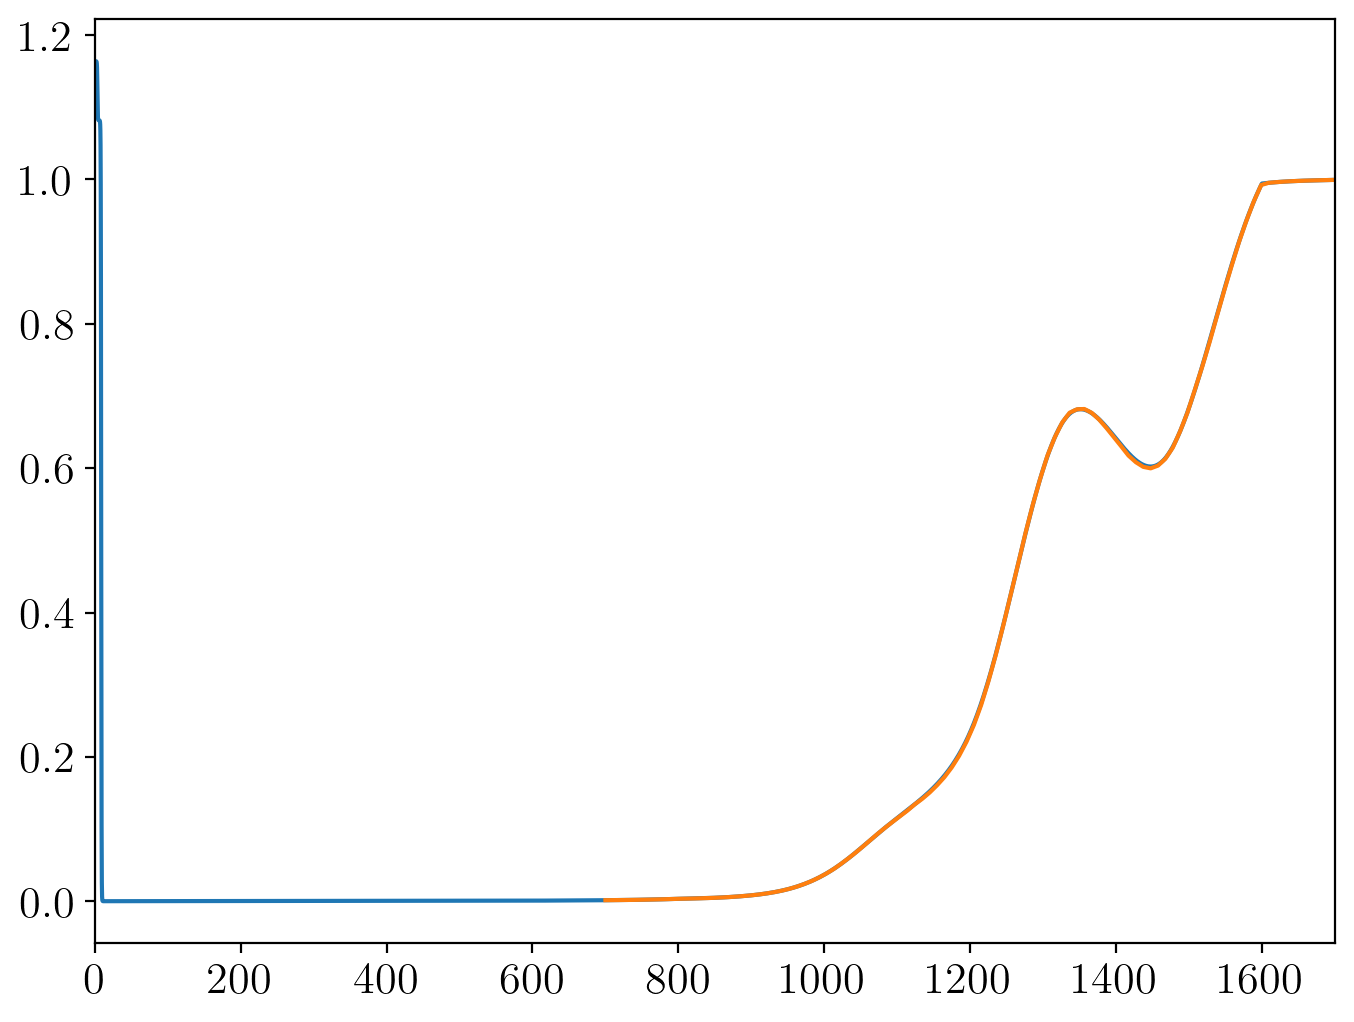

In [53]:
fig,ax = plt.subplots()
print(thermo.keys())
ax.plot(thermo["z"], thermo["x_e"])
ax.plot(em.output_info["output_z_grids"]["x_e"],pred["x_e"][0])
ax.set_xlim([0, 1700])

In [76]:
def integrand(z, xe_func, params, YHe = .245):
    cosmo = CosmoCalculator(params)
    prefactor = (cosmo.omega_b*cosmo.hubble)*(1-YHe)*(0.0684)
    return prefactor*xe_func(z)*(1+z)**2 / (cosmo.E(z))

In [97]:
xe_interp_fid = CubicSpline(thermo["z"], thermo["x_fid"], extrapolate=True)
xe_interp_pert = CubicSpline(thermo["z"], thermo["x_e"], extrapolate=True)

def optical_depth(z, xe_func, settings):
    return scipy.integrate.quad(integrand, 0, z, args=(xe_func, settings))[0]

In [98]:
optical_depth(1175.1317371597538, xe_interp_pert, total_settings)

1.008348611159441

In [101]:
thermo.keys()

dict_keys(['z', 'conf. time [Mpc]', 'x_e', 'x_fid', 'xe_pert', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])

In [ ]:
fig,ax = plt.subplots()


ax.plot(thermo["z"])